In [1]:
import pandas as pd
import janitor
from graph_utils import (
    save_mpl_fig,
    plotline, 
)

FP = '../../readable_news_lf/toi_parsed_all.csv.gz'

### Full sample

In [2]:
df = (pd.read_csv(FP, usecols=["ObjectType", "NumericPubDate"])
      .clean_names()
      .assign(
          date=lambda df: pd.to_datetime(df.numericpubdate, format='%Y%m%d'),
          qtr=lambda df: [dt.to_period('Q') for dt in df.date],
          c_ed=lambda df: df.objecttype.str.contains('Editorial|Commentary', case=False),
          c_img=lambda df: df.objecttype.str.contains('Image|Illustration', case=False)
      )
      .remove_columns('numericpubdate')
     )


periods = (2008-1839 + 1)*4 + 1
time_index = pd.date_range("10/01/1838", periods=periods, freq="QS")
df = (df      
      .groupby(['qtr']).sum().reset_index()
      .sort_values('qtr')
      .set_index('qtr')
      .reindex([dt.to_period('Q')for dt in time_index])      
      .reset_index())
df.head(3)

,qtr,c_ed,c_img
0,1838Q4,79.0,0.0
1,1839Q1,154.0,0.0
2,1839Q2,164.0,1.0


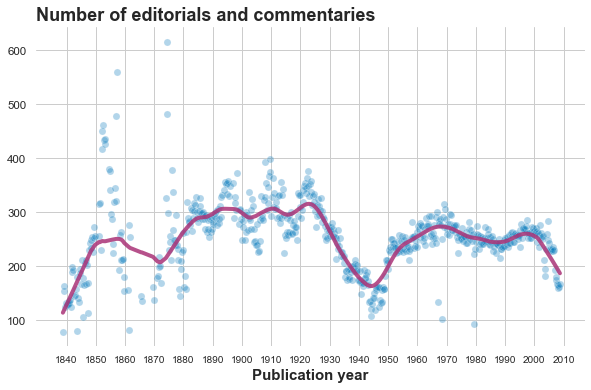

In [3]:
ax = plotline(x=df.index, y=df.c_ed, 
              bw=0.1,
              xrange=range(5, len(df)+40, 40),
              xticklabels=range(1840, 2015, 10),
              markersize=50,
              tickersize=10,
              title='Number of editorials and commentaries', 
             )    
save_mpl_fig('../figures/editorialscommentaries')

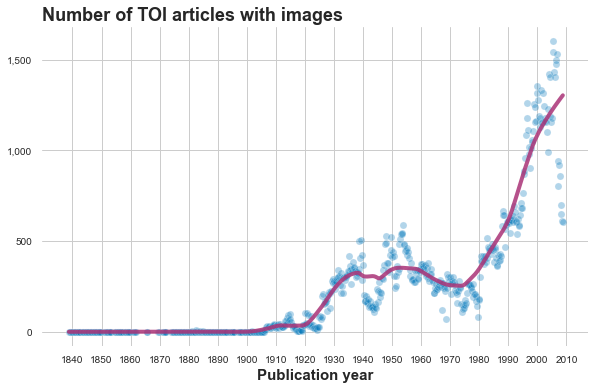

In [4]:
ax = plotline(x=df.index, y=df.c_img, 
              bw=0.1,
              xrange=range(5, len(df)+40, 40),
              xticklabels=range(1840, 2015, 10),
              yrange=range(0,2000,500), 
              markersize=50,
              tickersize=10,
              title='Number of TOI articles with images', 
             )    
ax.set_yticklabels([f'{tick:,.0f}' for tick in ax.get_yticks()])
save_mpl_fig('../figures/images')